## K Nearest Neighbors (KNN) Classifier


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, KFold
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
df = pd.read_csv('KNN_Project_Data')
df.head() 

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


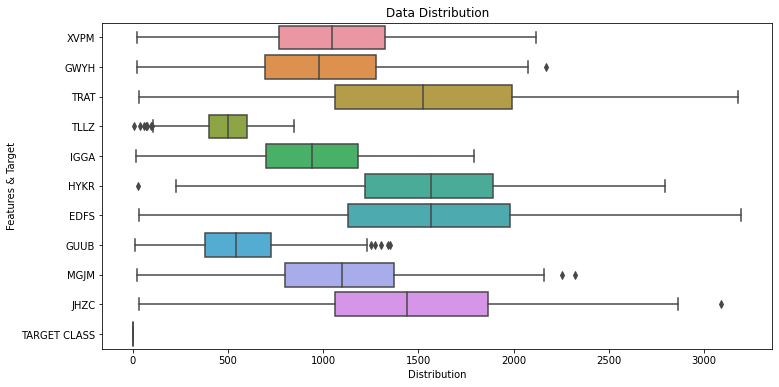

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), squeeze = False)
ax = sns.boxplot(data= df, orient='h').set_title("Data Distribution")#, xlabel='Distribution', ylabel='Features')
plt.xlabel('Distribution')
plt.ylabel('Features & Target')
plt.show()

In [29]:
X = df.drop('TARGET CLASS',axis=1)
y = df['TARGET CLASS']

### Train Test Data Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True, random_state=15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 10), (200, 10), (800,), (200,))

### Data Preprocessing

In [33]:
scaler_pipeline = Pipeline([ ('scaler', StandardScaler())])
X_train_norm = pd.DataFrame(scaler_pipeline.fit_transform(X_train),columns = X_train.columns) # fit and transform using scaler
X_train_norm.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,2.140754,0.329533,0.735882,-2.623983,1.613550,-0.169421,0.103872,2.073779,-0.184442,-0.219718
1,1.687445,-1.568837,-0.676163,0.242964,-0.285536,0.707574,-0.094756,-0.236455,0.637543,1.247993
2,1.665195,-1.113839,-0.305516,-1.013427,0.576818,-0.262469,-0.028828,-1.504081,-0.933200,0.145836
3,0.289459,1.337629,-1.544532,0.465249,-0.884256,-0.576249,-2.081711,-0.029393,-0.166570,0.034450
4,-0.880978,-1.528486,0.959899,-0.940900,1.981844,-0.298247,-1.249808,1.045512,0.058236,-0.470082


### KNN Model Training from scikit learn

In [35]:
# Define Hyperparameters to optimize.
leaf_size = list(range(1,20))
n_neighbors = list(range(1,10))
p = [1,2]

# Convert to dictionary
param_grid = dict(n_neighbors=n_neighbors, leaf_size = leaf_size, p=p)

#Create new KNN model object
knn_model = KNeighborsClassifier()

#Use GridSearch
kfold = KFold(n_splits= 5, shuffle=True, random_state= 15)
grid_search_CV = GridSearchCV(knn_model, param_grid, cv = 5)

#Fit the model
best_model = grid_search_CV.fit(X_train_norm,y_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 1
Best p: 1
Best n_neighbors: 8


In [50]:
# Print the Grid search scores for every parameter combination
cv_scores = grid_search_CV.cv_results_
for mean_score, params in zip(cv_scores["mean_test_score"], cv_scores["params"]):
    print('Model Accuracy%',(mean_score)*100, 'for Parameters', params)

Model Accuracy% 73.5 for Parameters {'leaf_size': 1, 'n_neighbors': 1, 'p': 1}
Model Accuracy% 72.50000000000001 for Parameters {'leaf_size': 1, 'n_neighbors': 1, 'p': 2}
Model Accuracy% 72.75 for Parameters {'leaf_size': 1, 'n_neighbors': 2, 'p': 1}
Model Accuracy% 73.0 for Parameters {'leaf_size': 1, 'n_neighbors': 2, 'p': 2}
Model Accuracy% 76.75 for Parameters {'leaf_size': 1, 'n_neighbors': 3, 'p': 1}
Model Accuracy% 78.0 for Parameters {'leaf_size': 1, 'n_neighbors': 3, 'p': 2}
Model Accuracy% 77.375 for Parameters {'leaf_size': 1, 'n_neighbors': 4, 'p': 1}
Model Accuracy% 77.125 for Parameters {'leaf_size': 1, 'n_neighbors': 4, 'p': 2}
Model Accuracy% 78.625 for Parameters {'leaf_size': 1, 'n_neighbors': 5, 'p': 1}
Model Accuracy% 79.125 for Parameters {'leaf_size': 1, 'n_neighbors': 5, 'p': 2}
Model Accuracy% 79.375 for Parameters {'leaf_size': 1, 'n_neighbors': 6, 'p': 1}
Model Accuracy% 78.25 for Parameters {'leaf_size': 1, 'n_neighbors': 6, 'p': 2}
Model Accuracy% 80.5 for P

#Optimal distance method is Manhattan or p = 1 with leaf_size=1 and neighbours=8

In [51]:
# Apply same Data normalization and Encoding techniques on test dataset
X_test_norm = scaler_pipeline.transform(X_test)
error_rate = []
for i in range(1,10):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_norm,y_train)
    pred_i = knn.predict(X_test_norm)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

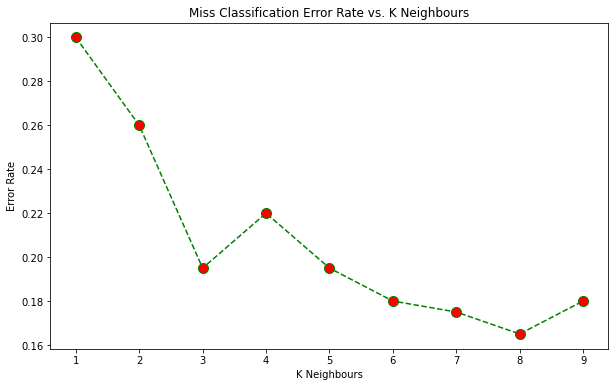

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate, color='green', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Miss Classification Error Rate vs. K Neighbours')
plt.xlabel('K Neighbours')
plt.ylabel('Error Rate')

### Model Performance Evaluation
### Create a Confusion Matrix and predicted Classification Report

In [39]:
y_pred = best_model.predict(X_test_norm)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85 19]
 [20 76]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       104
           1       0.80      0.79      0.80        96

    accuracy                           0.81       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.81      0.80       200



In [46]:
#y_test.reset_index(drop=True, inplace=True)
#y_pred.reset_index(drop=True, inplace=True)
df_predictions = pd.DataFrame({'True Classification':y_test, 'Predicted Classification':y_pred})
df_predictions

,True Classification,Predicted Classification
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
195,1,0
196,1,1
197,0,0
198,0,0
